In [1]:
#|default_exp app

In [2]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [3]:
#|export
from fastai.vision.all import *
import gradio as gr


def whichBear(x): return x[0].isBear()

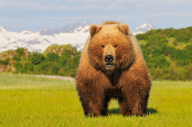

In [4]:
im = PILImage.create('brown_bear.jpg')
im.thumbnail((192,192))
im

In [7]:
#|export

if platform.system().lower() == "windows":
    import pathlib
    posix_path = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
learn = load_learner("model.pkl")
if platform.system().lower() == "windows":
    pathlib.PosixPath = posix_path

In [8]:
learn.predict(im)

('grizzly', tensor(1), tensor([2.7394e-04, 9.9953e-01, 1.9707e-04]))

In [9]:
#|export
options = ("grizzly", "black", "teddy")

def classify_img(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(options, map(float, probs)))

In [10]:
classify_img(im)

{'grizzly': 0.0002739447227213532,
 'black': 0.9995290040969849,
 'teddy': 0.000197066183318384}

In [11]:
#|export
image = gr.Image()
label = gr.Label()
examples = ["brown_bear.jpg", "grizzly_bear.jpg", "teddy_bear.jpg"]

intf = gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [12]:
pip install nbdev


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pathlib
plt = platform.system()
if plt == 'Windows': pathlib.PosixPath = pathlib.WindowsPath

In [15]:
from nbdev.export import nb_export

nb_export('app.ipynb')